# Understanding the Interevent Time Catalog on ETAS

Just loading in the catalog from R and working in Python

The paramaters of the syntheric catalog: 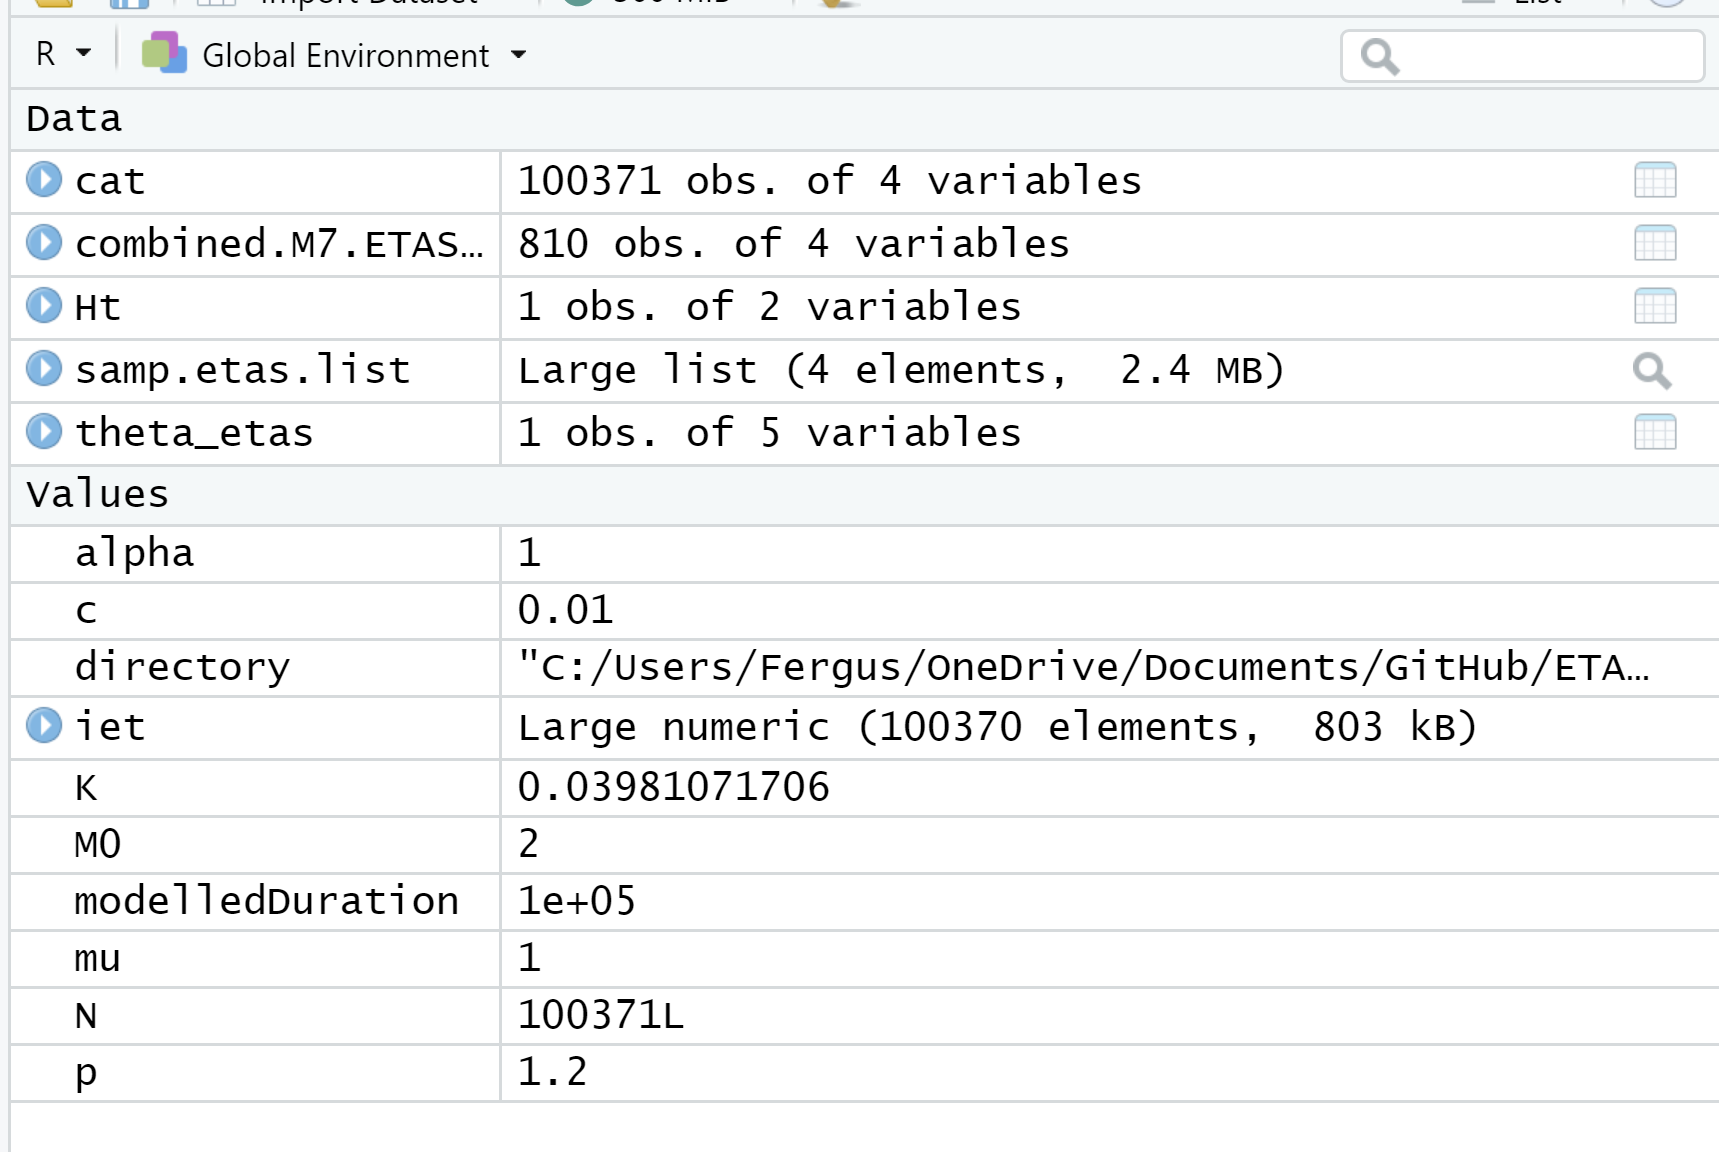

In [34]:
# Importing liabries 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Importing the datasets

data_new = pd.read_csv("1_mu_value_changedK_interevent_time_catalog.csv", names=['id','t'],skiprows=1)

In [35]:
# Not too sure what himanshu has done here

#counts
#bins
#plt.scatter(bins[:100],counts,s=5)
#plt.xlim(-6,2)

#plt.yscale('log')


In [36]:
# Checking dataset 

data_new.head()
print(data_new)

            id         t
0            1  0.297907
1            2  0.446616
2            3  0.377232
3            4  0.947248
4            5  0.864035
...        ...       ...
100541  100542  2.041133
100542  100543  0.770623
100543  100544  0.420958
100544  100545  0.363332
100545  100546       NaN

[100546 rows x 2 columns]


In [37]:
# Finding min 

data_new.t.min()

0.0

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Count')

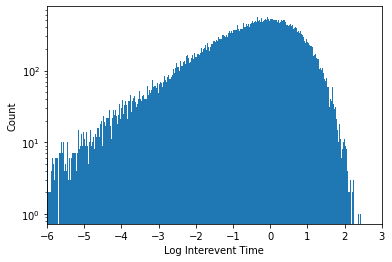

In [38]:
# Plotting the new histrogram should be simlair to Touati at mu = 1. 
# log iet, scale on y log and an x range 

counts, bins, bars = plt.hist(np.log(data_new.t), bins = 1000 , range = (-10,4))
plt.xlim(-6,3)
plt.yscale('log')
plt.xlabel("Log Interevent Time")
plt.ylabel("Count")

In [39]:
bins[:1000]

array([-1.000e+01, -9.986e+00, -9.972e+00, -9.958e+00, -9.944e+00,
       -9.930e+00, -9.916e+00, -9.902e+00, -9.888e+00, -9.874e+00,
       -9.860e+00, -9.846e+00, -9.832e+00, -9.818e+00, -9.804e+00,
       -9.790e+00, -9.776e+00, -9.762e+00, -9.748e+00, -9.734e+00,
       -9.720e+00, -9.706e+00, -9.692e+00, -9.678e+00, -9.664e+00,
       -9.650e+00, -9.636e+00, -9.622e+00, -9.608e+00, -9.594e+00,
       -9.580e+00, -9.566e+00, -9.552e+00, -9.538e+00, -9.524e+00,
       -9.510e+00, -9.496e+00, -9.482e+00, -9.468e+00, -9.454e+00,
       -9.440e+00, -9.426e+00, -9.412e+00, -9.398e+00, -9.384e+00,
       -9.370e+00, -9.356e+00, -9.342e+00, -9.328e+00, -9.314e+00,
       -9.300e+00, -9.286e+00, -9.272e+00, -9.258e+00, -9.244e+00,
       -9.230e+00, -9.216e+00, -9.202e+00, -9.188e+00, -9.174e+00,
       -9.160e+00, -9.146e+00, -9.132e+00, -9.118e+00, -9.104e+00,
       -9.090e+00, -9.076e+00, -9.062e+00, -9.048e+00, -9.034e+00,
       -9.020e+00, -9.006e+00, -8.992e+00, -8.978e+00, -8.964e

In [40]:
counts

array([  0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   5.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
         0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,
         0.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,   0.,   0.,   0.,
         0.,   0.,   6.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
         0.,   0.,   0.,   2.,   0.,   0.,   0.,   2.,   3.,   0.,   0.,
         0.,   0.,   3.,   0.,   0.,   0.,   0.,   

In [41]:
# Finiding bin width (to noramlise to linear binning / normailse count) 

b = np.log(data_new.t.max())
No_of_bins = 1000

bin_width = b/No_of_bins
print(np.exp(bin_width))

1.0024282894397878


In [42]:
# Finding the mean event rate and normalising the interevent time 

c = data_new.t.mean()

renormalised_data = data_new.t/c

print(data_new.head())

x = renormalised_data

print(type(x))

   id         t
0   1  0.297907
1   2  0.446616
2   3  0.377232
3   4  0.947248
4   5  0.864035
<class 'pandas.core.series.Series'>


In [43]:
x1 = bins[:1000]/c

(1000,)
(1000,)


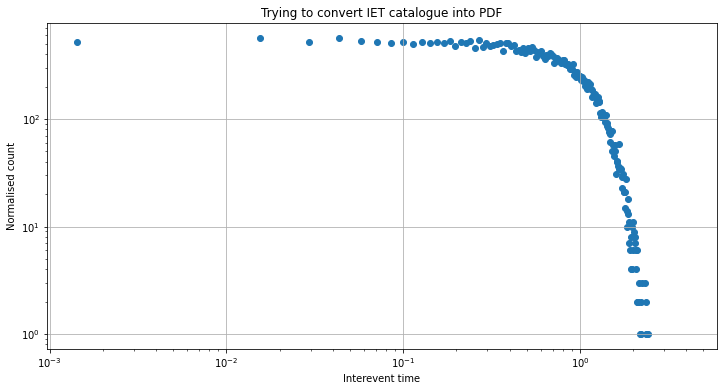

In [44]:
plt.figure(figsize=(12,6))


x1 = np.log(np.exp(bins[:1000])/c)
y = counts/np.exp(bin_width)

print(x1.shape)
print(y.shape)

plt.scatter((x1),y)
plt.title("Trying to convert IET catalogue into PDF")
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Interevent time")
plt.ylabel("Normalised count")
plt.grid()
plt.savefig("mid mu Trying to convvert IET into PDF" , bbox_inches='tight')